## «Анализ данных Олимпийских игр (поиск инсайтов, составление рекомендаций стейкхолдерам)»

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import scipy.stats as st
import re

In [5]:
import kagglehub

# Импортируем датасет с сайта Kaggle
path = kagglehub.dataset_download("josephcheng123456/olympic-historical-dataset-from-olympediaorg")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'olympic-historical-dataset-from-olympediaorg' dataset.
Path to dataset files: /kaggle/input/olympic-historical-dataset-from-olympediaorg


In [6]:
df_1 = pd.read_csv('/kaggle/input/olympic-historical-dataset-from-olympediaorg/Olympic_Athlete_Bio.csv')
df_1.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   born           151808 non-null  object 
 4   height         105112 non-null  float64
 5   weight         105112 non-null  object 
 6   country        155861 non-null  object 
 7   country_noc    155861 non-null  object 
 8   description    54863 non-null   object 
 9   special_notes  60637 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.9+ MB


Описание данных файла №1:

1.		athlete_id - Уникальный идентификатор спортсмена
2.		name - Полное имя спортсмена
3.		sex - Мужчина или женщина
4.		born - Дата рождения спортсмена
5.		height - Рост спортсмена в см
6.		weight - Вес спортсмена в кг
7.		country - Страна, которую представляет спортсмен
8.		country_noc - Код страны, которую представляет спортсмен
9.		description - Некоторое описание игрока в абзаце
10.		special_notes - Особые примечания об игроке в dotpoints


In [8]:
df_2 = pd.read_csv('/kaggle/input/olympic-historical-dataset-from-olympediaorg/Olympic_Athlete_Event_Results.csv')
df_2.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB


Описание данных файла №2:

1.		edition - Тип Олимпийских игр (Год - Лето / Зима и пр.)
2.		edition_id - Идентификатор Олимпийских игр, который может быть полезен для получения URL-адреса Олимпийских игр
3.		country_noc - Код страны, за которую выступает спортсмен
4.		sport - Вид спорта, в котором проводится данное мероприятие. Является родительским для нескольких мероприятий.
5.		event - Конкретное событие в определенном виде спорта
6.		result_id - Идентификатор результата/события для страницы реальных событий
7.		athlete - Имя спортсмена, участвующего в мероприятии
8.		athlete_id - Идентификатор спортсмена, который можно использовать для присоединения к биографии спортсмена.
9.		pos - Позиция, которую спортсмен занял в соревновании
10.		medal - Указывает выиграл ли спортсмен медаль, и если да, то золотую, серебряную или бронзовую
11.		isTeamSport - Указывает, является ли данное соревнование командным видом спорта.


In [10]:
df_3 = pd.read_csv('/kaggle/input/olympic-historical-dataset-from-olympediaorg/Olympic_Games_Medal_Tally.csv')
df_3

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1802,1906 Intercalated,4,1906,Canada,CAN,1,1,0,2
1803,1906 Intercalated,4,1906,Norway,NOR,1,1,0,2
1804,1906 Intercalated,4,1906,Netherlands,NED,0,1,2,3
1805,1906 Intercalated,4,1906,Australia,AUS,0,0,3,3


In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


Описание данных файла №3:

1.		edition - Тип Олимпийских игр (Год - Лето / Зима и пр.)
2.		edition_id - Идентификатор Олимпийских игр, который может быть полезен для получения URL-адреса Олимпийских игр
3.		year - Год, в котором проводилась игра
4.		country - Страна, в которой проходила игра
5.		country_noc - Код страны, в которой была размещена игра
6.		gold - Количество золотых медалей
7.		silver - Количество серебряных медалей
8.		bronze - Количество бронзовых медалей
9.		total - Общее количество медалей


In [12]:
df_4 = pd.read_csv('/kaggle/input/olympic-historical-dataset-from-olympediaorg/Olympic_Results.csv')
df_4.head()

,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk...,na,"Not so much a competition as a coronation, the..."
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 196...,The women’s giant slalom was postponed one day...
2,76,"Singles, Men",1976 Winter Olympics,40,Luge,/editions/40/sports/LUG,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Verti...,"Once more, the competitors from East and West ..."
3,962,"1,500 metres, Men",1928 Winter Olympics,30,Speed Skating,/editions/30/sports/SSK,14 February 1928 — 9:00,"Olympia-Eisstadion Badrutts Park, St. Moritz",30 from 14 countries,na,na,There was little doubt that the Olympic 1500 m...
4,258824,"Canadian Singles, Slalom, Men",2008 Summer Olympics,53,Canoe Slalom,/editions/53/sports/CSL,11 – 12 August 2008,"Shunyi Aolinpike Shuishang Gongyuan, Mapo, Shunyi",16 from 16 countries,na,na,Two former Olympic champions in the C-1 slalom...


In [13]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7394 non-null   int64 
 1   event_title          7394 non-null   object
 2   edition              7394 non-null   object
 3   edition_id           7394 non-null   int64 
 4   sport                7394 non-null   object
 5   sport_url            7394 non-null   object
 6   result_date          7394 non-null   object
 7   result_location      7393 non-null   object
 8   result_participants  7394 non-null   object
 9   result_format        7394 non-null   object
 10  result_detail        7394 non-null   object
 11  result_description   7394 non-null   object
dtypes: int64(2), object(10)
memory usage: 693.3+ KB


Описание данных файла №4:

1.		result_id - Уникальный идентификатор результата
2.		event_title - Наименование события результата
3.		edition - Тип Олимпийских игр (Год - Лето / Зима и пр.)
4.		edition_id - Идентификатор Олимпийских игр, который может быть полезен для получения URL-адреса Олимпийских игр
5.		sport - Вид спорта, в котором проводится данное мероприятие. Является родительским для нескольких мероприятий.
6.		sport_url - URL для вида спорта на фактическое событие
7.		result_date - Дата проведения мероприятия
8.		result_location - Место проведения мероприятия
9.		result_participants - Количество участников из количества стран
10.		result_format - Формат мероприятия
11.		result_detail - Дополнительная информация о результате
12.		result_description - Дополнительное описание результата


In [14]:
df_5 = pd.read_csv('/kaggle/input/olympic-historical-dataset-from-olympediaorg/Olympics_Country.csv')
df_5

,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra
...,...,...
230,YEM,Yemen
231,YUG,Yugoslavia
232,ZAM,Zambia
233,ZIM,Zimbabwe


Описание данных файла №5:

1.		noc - Код страны
2.		country - Название страны


In [15]:
df_6 = pd.read_csv('/kaggle/input/olympic-historical-dataset-from-olympediaorg/Olympics_Games.csv')
df_6.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN


In [16]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          54 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


Описание данных файла №6:

1.		edition - Тип Олимпийских игр (Год - Лето / Зима и пр.)
2.		edition_id - Идентификатор Олимпийских игр, который может быть полезен для получения URL-адреса Олимпийских игр
3.		edition_url - URL-адрес издания/Олимпийской игры, который можно использовать для получения информации
4.		year - Год, в котором проводилась игра
5.		city - Город, в котором проводилась игра
6.		country_flag_url - URL-адрес флага страны для значка изображения флага
7.		country_noc - Код страны NOC, который можно связать с CSV-файлом страны Олимпиады для названия страны
8.		start_date - Дата начала олимпийского мероприятия
9.		end_date - Дата окончания олимпийского мероприятия
10.		competition_date - Даты проведения олимпийского мероприятия
11.		isHeld - Информация о том, состоялись ли Олимпийские игры из-за войны или нет


## Соберём рабочий датасет из нужных колонок

Работа с файлом №1:

- Оставляем значимые для исследования поля

- Переименовываем имя поля с названием и кодом страны, для того, чтобы не путать со страной проведения игр

In [17]:
df_1.columns

Index(['athlete_id', 'name', 'sex', 'born', 'height', 'weight', 'country',
       'country_noc', 'description', 'special_notes'],
      dtype='object')

In [18]:
df_1 = df_1[['athlete_id', 'sex', 'height', 'weight', 'country', 'country_noc']]

df_1 = df_1.rename(columns={'country': 'country_athl', 'country_noc': 'country_noc_athl'})
df_1.head()

,athlete_id,sex,height,weight,country_athl,country_noc_athl
0,65649,Female,166.0,55,Bulgaria,BUL
1,112510,Female,184.0,70,Russian Federation,RUS
2,114973,Male,165.0,55,Qatar,QAT
3,30359,Male,NaN,NaN,Hungary,HUN
4,50557,Male,NaN,NaN,Czechoslovakia,TCH


Работа с файлом №2

- Разбиваем первый столбец на два: 1) Год проведения игр; 2) Тип Олимпийских игр

- Оставляем значимые для исследования поля

- Соединяем преобразованные таблицы №1 и 2 (обогащая вторую таблицу данными из первой). Выстроим столбцы в удобном для восприятия порядке. И оставим информацию только по играм, которые проведены в 21 веке, в связи с сильно изменившейся геополитической картой мира.

In [19]:
df_2['year'] = df_2['edition'].str.extract(r'^(\d{4})')
df_2['edition'] = df_2['edition'].str.extract(r'\s(\w+\b)')
df_2

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year
0,Summer,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False,1908
1,Summer,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False,1908
2,Summer,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False,1908
3,Summer,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False,1908
4,Summer,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False,1908
...,...,...,...,...,...,...,...,...,...,...,...,...
316829,Winter,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,NaN,False,2022
316830,Winter,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,NaN,False,2022
316831,Winter,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,NaN,False,2022
316832,Winter,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,NaN,False,2022


In [20]:
df_2 = df_2[['edition', 'year',	'edition_id', 'sport', 'athlete_id']]
df_2.head()

,edition,year,edition_id,sport,athlete_id
0,Summer,1908,5,Athletics,64710
1,Summer,1908,5,Athletics,64756
2,Summer,1908,5,Athletics,64808
3,Summer,1908,5,Athletics,922519
4,Summer,1908,5,Athletics,64735


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   edition     316834 non-null  object
 1   year        316834 non-null  object
 2   edition_id  316834 non-null  int64 
 3   sport       316834 non-null  object
 4   athlete_id  316834 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 12.1+ MB


In [22]:
df = df_2.merge(df_1, on='athlete_id', how='left')
df = df.loc[df['year'] >= '2000']
df[['year', 'edition', 'edition_id', 'sport', 'athlete_id', 'sex', 'height', 'weight', 'country_athl', 'country_noc_athl']]

,year,edition,edition_id,sport,athlete_id,sex,height,weight,country_athl,country_noc_athl
383,2000,Summer,25,Athletics,83241,Male,173.0,64,Aruba,ARU
384,2000,Summer,25,Athletics,83240,Female,158.0,50,Aruba,ARU
385,2000,Summer,25,Judo,91878,Male,173.0,66,Aruba,ARU
386,2000,Summer,25,Swimming,93253,Male,176.0,72,Aruba,ARU
387,2000,Summer,25,Swimming,93254,Female,171.0,56,Aruba,ARU
...,...,...,...,...,...,...,...,...,...,...
316829,2022,Winter,62,Bobsleigh,148662,Female,NaN,NaN,Netherlands,NED
316830,2022,Winter,62,Bobsleigh,138683,Female,175.0,76,Slovakia,SVK
316831,2022,Winter,62,Bobsleigh,137542,Female,170.0,78,Republic of Korea,KOR
316832,2022,Winter,62,Bobsleigh,128682,Female,175.0,75-78,Jamaica United States,JAM


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112404 entries, 383 to 316833
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   edition           112404 non-null  object 
 1   year              112404 non-null  object 
 2   edition_id        112404 non-null  int64  
 3   sport             112404 non-null  object 
 4   athlete_id        112404 non-null  int64  
 5   sex               112404 non-null  object 
 6   height            99806 non-null   float64
 7   weight            99806 non-null   object 
 8   country_athl      112404 non-null  object 
 9   country_noc_athl  112404 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 9.4+ MB


Описание данных рабочего датасета:

1.	edition - Тип Олимпийских игр (Лето / Зима)
2.	year - Год, в котором проводилась игра
3.	edition_id - Идентификатор Олимпийских игр
4.	sport - Вид спорта, в котором проводится данное мероприятие. Является родительским для нескольких мероприятий.
5.	athlete_id - Идентификатор спортсмена
6.	sex - Пол спортсмена
7.	height - Рост спортсмена в см
8.	weigh - Вес спортсмена в кг
9.	country_athl - Страна, которую представляет спортсмен
10.	country_noc_athl - Код страны, которую представляет спортсмен


Проверим типы игр на наличие посторонних данных

In [24]:
df['edition'].unique()

array(['Summer', 'Winter'], dtype=object)

***Вывод: присутствуют только зимние и летние игры => всё в порядке***

---



**Система не определила поле с данными веса спортсмена как числовое - выясним почему: составим функцию, определяющую список уникальных нечисловых значений поля. Используем регулярные выражения.**

Так же этот алгоритм будет служить фильтром, контролирующим дальнейшие преобразования значений столбца.

In [25]:
def kontrol():
  list_weight = []
  spisok = df['weight'].unique() # список уникальных значений веса - в нём будем искать
  for x in spisok:
    try:
      chislo = re.search(r'\d{2,3}', str(x)).group() # в каждом значении веса ищем просто 2-3-значные числа, т.к. вес человека находится в диапазоне [10; 500]
      if x != chislo:  # в итоговый список добавим те данные, которые не оказались точной копией найденного ранее числа
        list_weight.append(x)
    except:
      list_weight.append(x)
  return list_weight

print(kontrol())
print(len(kontrol()))

['76-94', nan, '76-77', '69-77', '73-77', '60-65', '58, 68', '149-163', '101-125', '97-105', '68-69', '58-64', '54-57', '74-75', '92-95', '53-56', '92-94', '105-109', '75-81', '70-84', '92-97', '77-81', '95-100', '107-136', '158-160', '210-218', '70-77', '93-104', '70-75', '68-70', '52-56', '52-62', '69-80', '49-53', '158-168', '69-75', '105-132', '132-135', '62-73', '76, 83', '89-103', '67, 71', '155-160', '146-155', '55-59', '88-91', '77-82', '58-63', '95-102', '72-76', '85-92', '85-89', '62-68', '147-163', '68-88', '160-170', '95-110', '68, 80', '54-64', '75-78', '87-93', '55-58', '48-57', '102, 105', '59-61', '60-68', '82-84', '70-83', '89-97', '69-70', '52-82', '63-68', '80-86', '74-78', '99-101', '59-62', '118-138', '74-82', '72-80', '95-98', '90-97', '63-67', '56-62', '75-77', '81-82', '90-94', '83-93', '90-95', '75-89', '77-80', '92-96', '95-113', '88-95', '57-63', '48-49', '70-71', '52-59', '85-86', '67-72', '54-58', '63-64', '70-72', '74-83', '74-90', '68-75', '60-62', '88-96

Большинство нечисловых значений - это диапазоны, записанные через дефис.

Заменим эти данные на большее, из них, значение.

In [26]:
list_w = []
for x in df['weight']:
  try:
    slovo = re.search(r'(\d{2,3})-(\d{2,3})', str(x)).group()
    if x == slovo:
      chislo = re.search(r'\d{2,3}$', str(x)).group()
      list_w.append(chislo)
  except:
    list_w.append(x)

df['weight'] = list_w

Проконтролируем изменения в столбце - повторим составление списка уникальных нечисловых значений поля.

In [27]:
print(kontrol())
print(len(kontrol()))

[nan, '58, 68', '76, 83', '67, 71', '68, 80', '102, 105', '78, 80', '63, 66', '56\xa0', '72\xa0', '62, 67', '67, 69', '100, 104', '86, 90', '67, 72', '77,5', '68, 88', '80, 86']
18


В оставшемся списке присутствуют два вида мешающих нам значений: пары чисел, записанных через запятую и числа, некорректно сохранившиеся - присутствует текстовый "мусор".

Первый вид приведём к нормальному виду оставив второе из пары чисел, а в "замусоренных" данных - уберём лишние символы.

In [28]:
list_w = []
for x in df['weight']:
  try:
    slovo = re.search(r'(\d{2,3}),\s(\d{2,3})', str(x)).group()
    if x == slovo:
      chislo = re.search(r'\d{2,3}$', str(x)).group()
      list_w.append(chislo)
  except:
    list_w.append(x)

df['weight'] = list_w


In [29]:
list_w = []
for x in df['weight']:
  try:
    chislo = re.search(r'\d{2,3}', str(x)).group()
    list_w.append(chislo)
  except:
    list_w.append(x)

df['weight'] = list_w


Проконтролируем изменения в столбце - повторим составление списка уникальных нечисловых значений поля (должно остаться только пустое значение).

In [30]:
print(kontrol())
print(len(kontrol()))

[nan]
1


***Вывод: В контрольном списке остались только пустые значения ==> все значения веса спортсменов приведены в числовой вид и можно менять тип данных***

---



Для заполнения пустых значений, сначала приведём данные к числовому типу

In [31]:
df['year'] = pd.to_numeric(df['year'])
df['weight'] = pd.to_numeric(df['weight'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112404 entries, 383 to 316833
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   edition           112404 non-null  object 
 1   year              112404 non-null  int64  
 2   edition_id        112404 non-null  int64  
 3   sport             112404 non-null  object 
 4   athlete_id        112404 non-null  int64  
 5   sex               112404 non-null  object 
 6   height            99806 non-null   float64
 7   weight            99806 non-null   float64
 8   country_athl      112404 non-null  object 
 9   country_noc_athl  112404 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 9.4+ MB


В столбцах "вес" и "рост" одинаковое количество пропущенных данных.

Перед заполнением проверим **Гипотезу: что у все спортсмены, которые не указали рост - они же и не указали и вес.**

Посмотрим распределение наличия максимальных значений роста и веса в разных видах спорта по странам

In [32]:
df_height_max = pd.pivot_table(data=df, index='country_noc_athl', columns='sport', values='height', aggfunc='max')
df_height_max

sport,3x3 Basketball,Alpine Skiing,Archery,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling,Wushu
country_noc_athl,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,...,NaN,186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AHO,NaN,NaN,NaN,NaN,NaN,186.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,183.0,NaN,NaN,NaN,NaN,NaN
ALB,NaN,180.0,NaN,NaN,NaN,195.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,189.0,NaN
ALG,NaN,169.0,NaN,164.0,NaN,190.0,182.0,NaN,NaN,NaN,...,178.0,162.0,185.0,170.0,NaN,186.0,NaN,185.0,180.0,NaN
AND,NaN,187.0,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIE,NaN,NaN,NaN,165.0,NaN,170.0,168.0,NaN,NaN,NaN,...,165.0,192.0,NaN,NaN,NaN,NaN,NaN,165.0,165.0,170.0
VIN,NaN,NaN,NaN,NaN,NaN,187.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,162.0,NaN,185.0,NaN,NaN,NaN,NaN,...,NaN,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


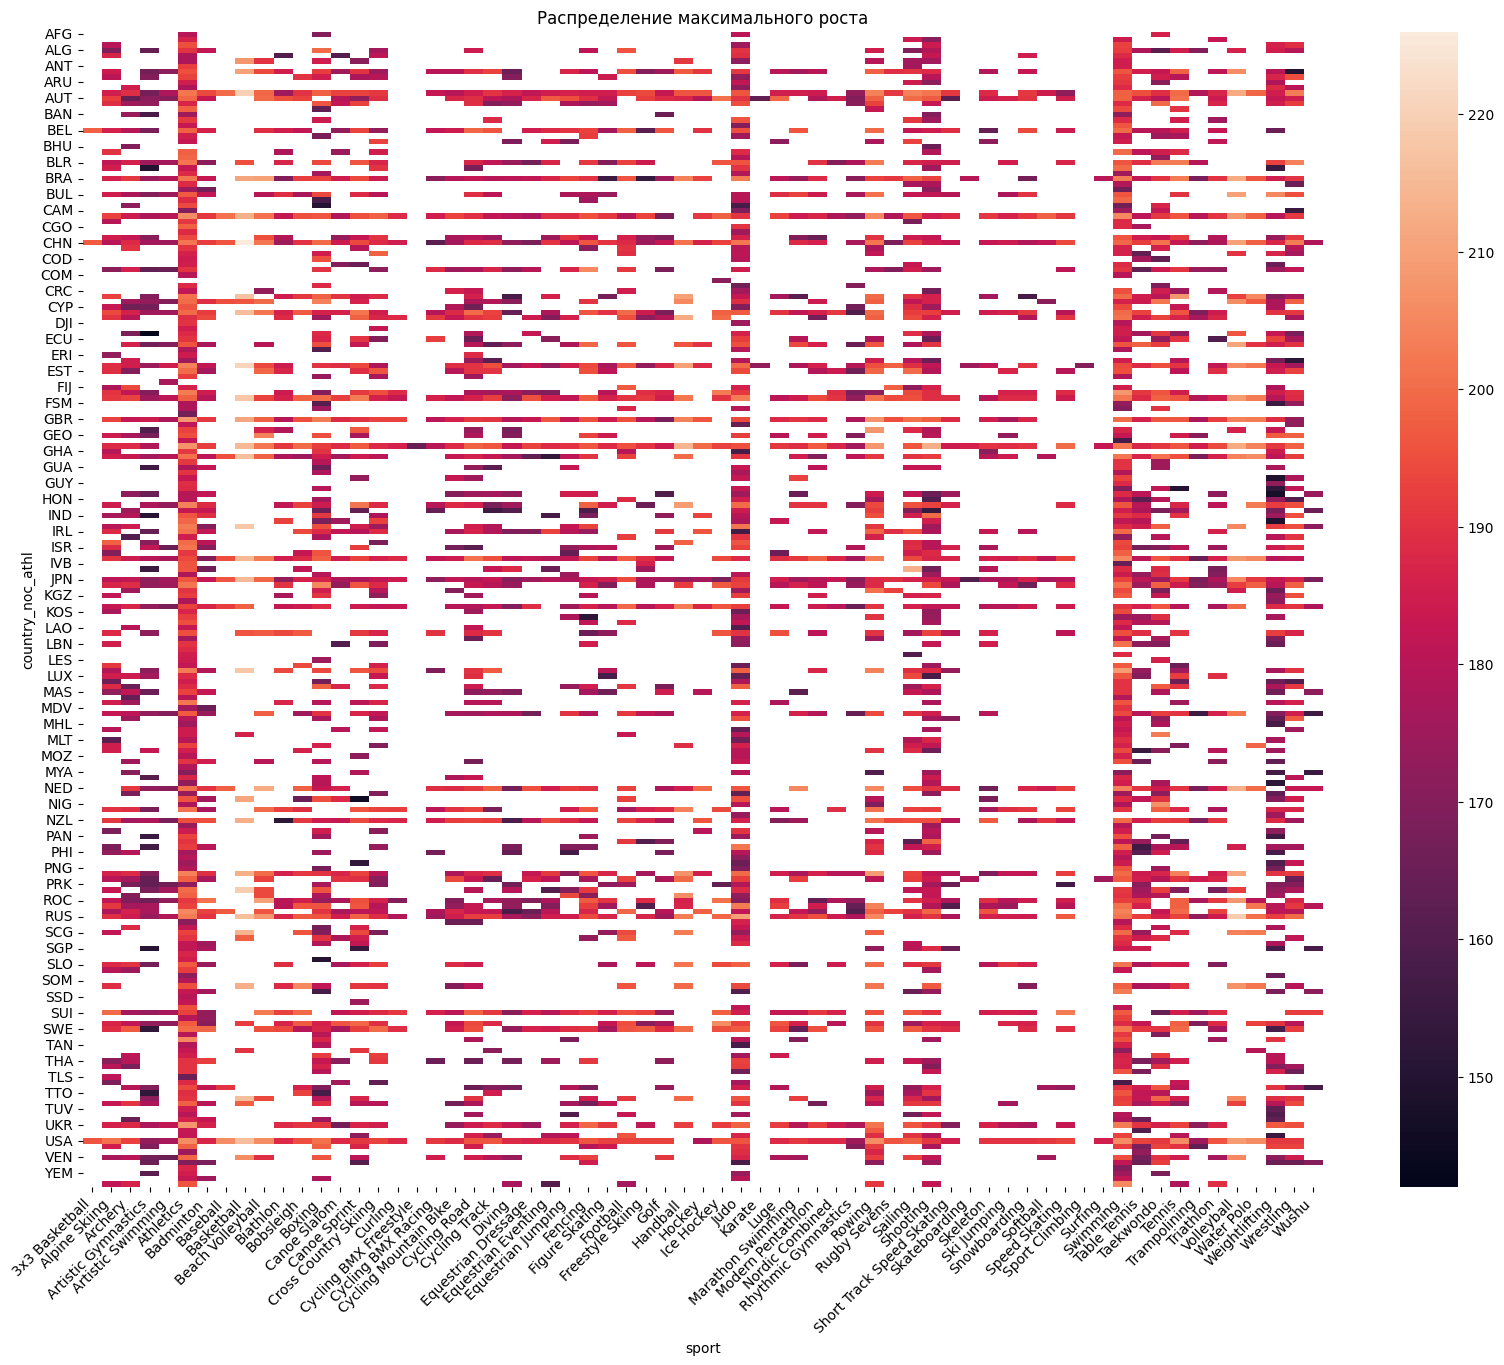

In [33]:
mplt.figure(figsize=[20,15])
sns.heatmap(df_height_max)
mplt.title("Распределение максимального роста")
mplt.xticks(rotation=45, ha='right')
mplt.show()

***Вывод: Наблюдается очевидное преобладание роста спортсменов большего, чем 180 см.***

---



In [34]:
df_weight_max = pd.pivot_table(data=df, index='country_noc_athl', columns='sport', values='weight', aggfunc='max')
df_weight_max

sport,3x3 Basketball,Alpine Skiing,Archery,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling,Wushu
country_noc_athl,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,NaN,NaN,...,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AHO,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN
ALB,NaN,74.0,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,100.0,NaN
ALG,NaN,59.0,NaN,55.0,NaN,88.0,82.0,NaN,NaN,NaN,...,70.0,57.0,75.0,70.0,NaN,80.0,NaN,125.0,96.0,NaN
AND,NaN,85.0,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIE,NaN,NaN,NaN,55.0,NaN,62.0,60.0,NaN,NaN,NaN,...,59.0,90.0,NaN,NaN,NaN,NaN,NaN,85.0,53.0,60.0
VIN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,54.0,NaN,68.0,NaN,NaN,NaN,NaN,...,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


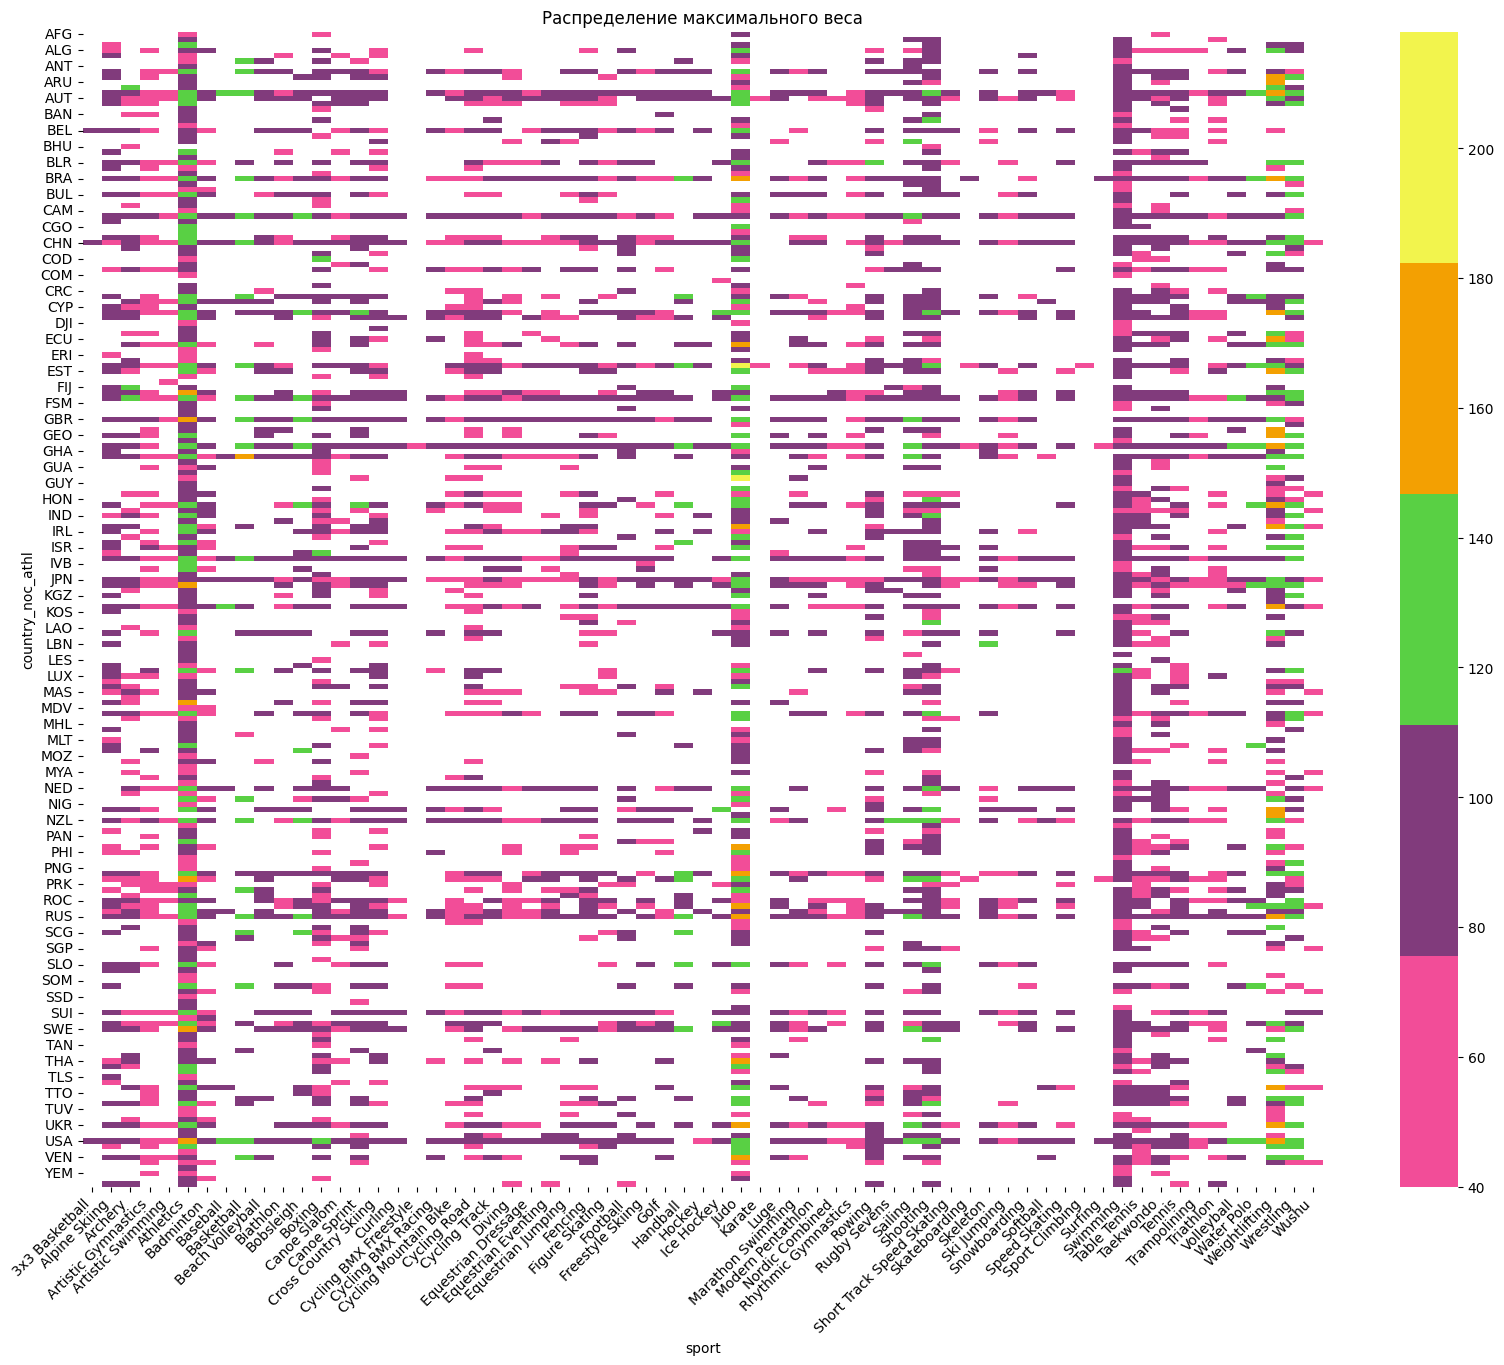

In [35]:
mplt.figure(figsize=[20,15])
colors = ['#F24D98FF', '#813B7CFF', '#59D044FF', '#F3A002FF', '#F2F44DFF']
sns.heatmap(df_weight_max, cmap=colors)
mplt.title("Распределение максимального веса")
mplt.xticks(rotation=45, ha='right')
mplt.show()

***Вывод: Наблюдаем закономерную картину распределения веса: большой вес - в тяжеловесных видах спорта, у остальных спортсменов вес ниже среднего значения.***



---



**Заполнить пустые значения по двум критериям спорт+страна не представляется возможным, т.к. во многих странах целиком по определённым видам спорта отсутствуют данные.**

1) Определим вид спорта, в которых пустые значения

In [37]:
df_null_height = df.loc[pd.isnull(df.height), :]
df_null_height

,edition,year,edition_id,sport,athlete_id,sex,height,weight,country_athl,country_noc_athl
458,Summer,2016,59,Archery,129123,Female,NaN,NaN,Bangladesh,BAN
459,Summer,2016,59,Athletics,132639,Male,NaN,NaN,Bangladesh,BAN
464,Summer,2016,59,Swimming,129125,Female,NaN,NaN,Bangladesh,BAN
465,Summer,2020,61,Archery,140936,Male,NaN,NaN,Bangladesh,BAN
466,Summer,2020,61,Archery,140934,Female,NaN,NaN,Bangladesh,BAN
...,...,...,...,...,...,...,...,...,...,...
316821,Winter,2022,62,Bobsleigh,147913,Female,NaN,NaN,Canada,CAN
316822,Winter,2022,62,Bobsleigh,148025,Female,NaN,NaN,People's Republic of China,CHN
316828,Winter,2022,62,Bobsleigh,148470,Female,NaN,NaN,Italy,ITA
316829,Winter,2022,62,Bobsleigh,148662,Female,NaN,NaN,Netherlands,NED


In [38]:
df_null_height['weight'].unique()

array([nan])

***Вывод: получили подтверждение своей гипотезы: все спортсмены, которые не указали рост - они же и не указали и вес. Значит можем работать с обоими параметрами из одного датасета.***

---



In [39]:
print(df_null_height['sport'].unique())
print(len(df_null_height['sport'].unique()))

['Archery' 'Athletics' 'Swimming' 'Judo' 'Sailing' 'Skeleton' 'Boxing'
 'Handball' 'Shooting' 'Rowing' 'Canoe Sprint' 'Artistic Gymnastics'
 'Alpine Skiing' 'Wrestling' 'Taekwondo' 'Figure Skating' 'Wushu'
 'Badminton' 'Cycling Road' 'Fencing' 'Karate' 'Rhythmic Gymnastics'
 'Weightlifting' 'Cross Country Skiing' 'Luge' 'Canoe Slalom'
 'Snowboarding' 'Tennis' 'Marathon Swimming' 'Table Tennis' 'Football'
 'Biathlon' 'Freestyle Skiing' 'Trampolining' 'Speed Skating'
 'Cycling BMX Freestyle' 'Surfing' 'Short Track Speed Skating' 'Baseball'
 'Diving' 'Equestrian Jumping' 'Volleyball' 'Cycling BMX Racing'
 'Cycling Track' 'Golf' 'Skateboarding' 'Water Polo' 'Modern Pentathlon'
 'Equestrian Dressage' 'Triathlon' 'Rugby Sevens' 'Basketball'
 'Beach Volleyball' 'Cycling Mountain Bike' 'Equestrian Eventing'
 'Sport Climbing' 'Bobsleigh' 'Curling' 'Ice Hockey' 'Nordic Combined'
 'Ski Jumping' 'Artistic Swimming' 'Hockey' '3x3 Basketball' 'Softball']
65


***Вывод: 65 видов спорта, где присутствуют пустые значения***

---



  2) Посмотрим статистику по весу и росту спортсменов

In [40]:
df[['height', 'weight']].describe()

,height,weight
count,99806.000000,99806.00000
mean,175.794481,71.04617
std,10.860007,15.11532
min,133.000000,28.00000
25%,168.000000,60.00000
50%,175.000000,70.00000
75%,183.000000,80.00000
max,226.000000,218.00000


  3) Заполним пропущенные данные веса и роста максимальным значением из множества спортсменов в этом виде спорта, т.к. пусть лучше человек со средними габаритами будет ощущать себя свободно, чем человек с большим весом/ростом будет стеснён в чём-либо.

In [41]:
df['weight'] = df.groupby('sport')['weight'].transform(lambda x: x.fillna(x.max()))
df['height'] = df.groupby('sport')['height'].transform(lambda x: x.fillna(x.max()))

In [42]:
df[['height', 'weight']].describe()

,height,weight
count,112404.000000,112404.000000
mean,178.705776,76.190990
std,13.440562,22.730559
min,133.000000,28.000000
25%,169.000000,61.000000
50%,178.000000,72.000000
75%,186.000000,85.000000
max,226.000000,218.000000


***Вывод: новая статистика показала, что все данные заполнены, а изменившиеся в большую сторону средние и квантили подтверждают заполнение максимальными значениями***

---



Посмотрим на эту статистику по типам Олимпиад

In [43]:
df.groupby('edition')[['height', 'weight']].describe()

height                                                            \
           count        mean        std    min    25%    50%    75%    max   
edition                                                                      
Summer   83737.0  179.163655  14.076023  133.0  169.0  178.0  187.0  226.0   
Winter   28667.0  177.368298  11.277247  145.0  169.0  177.0  184.0  206.0   

          weight                                                       
           count       mean        std   min   25%   50%   75%    max  
edition                                                                
Summer   83737.0  76.907389  24.584349  28.0  61.0  72.0  85.0  218.0  
Winter   28667.0  74.098371  15.956294  34.0  62.0  72.0  84.0  127.0

Распределение роста всех спортсменов на диаграмме

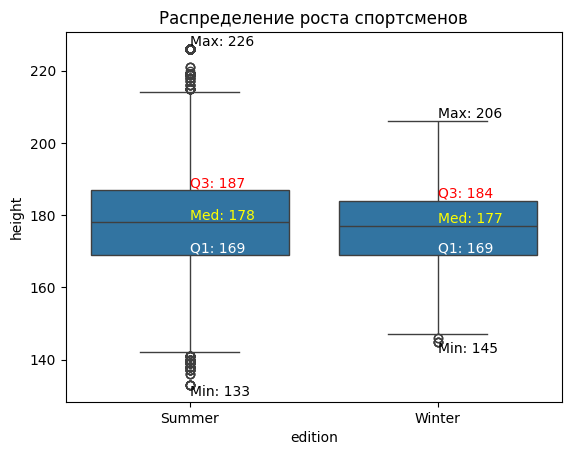

In [44]:
ax = sns.boxplot(data=df, x='edition', y='height')
mplt.title("Распределение роста спортсменов")
for i, group in enumerate(df['edition'].unique()):
    group_data = df[df['edition'] == group]['height'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='left', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='left', va='bottom', color='yellow')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='left', va='bottom', color='red')

mplt.show()

Распределение веса всех спортсменов на диаграмме

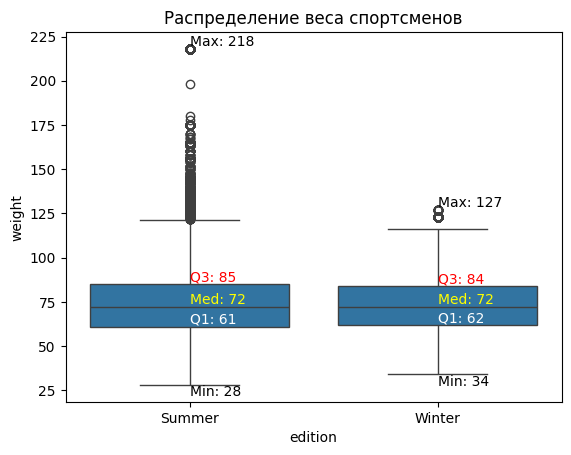

In [45]:
ax = sns.boxplot(data=df, x='edition', y='weight')
mplt.title("Распределение веса спортсменов")
for i, group in enumerate(df['edition'].unique()):
    group_data = df[df['edition'] == group]['weight'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='left', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='left', va='bottom', color='yellow')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='left', va='bottom', color='red')

mplt.show()

***Вывод: наблюдаем множественные верхние выбросы в летних Олимпийских играх, что связано с большим количеством данных - почти троекратным увеличением общего числа спортсменов, по сравнению с зимними играми. Но выбросы не являются аномалиями, т.к. находятся в диапазоне реально допустимых значений роста/веса человека.***

---



**Разделим выборку на зимние и летние игры. И дальнейшее исследование будет
разграничено по сезонам.**

In [47]:
df_winter = df[df['edition']=='Winter']
df_summer = df[df['edition']=='Summer']

# Зимние игры:

**Посмотрим на распределение данных по гендерному признаку.**

In [48]:
df_winter_male = df_winter[df_winter['sex']=='Male']
df_winter_male

,edition,year,edition_id,sport,athlete_id,sex,height,weight,country_athl,country_noc_athl
557,Winter,2022,62,Skeleton,140556,Male,197.0,127.0,American Samoa,ASA
1314,Winter,2006,49,Alpine Skiing,110734,Male,180.0,74.0,Albania,ALB
1315,Winter,2006,49,Alpine Skiing,110734,Male,180.0,74.0,Albania,ALB
1316,Winter,2006,49,Alpine Skiing,110734,Male,180.0,74.0,Albania,ALB
1329,Winter,2010,57,Alpine Skiing,110734,Male,180.0,74.0,Albania,ALB
...,...,...,...,...,...,...,...,...,...,...
316799,Winter,2022,62,Speed Skating,149165,Male,203.0,100.0,United States,USA
316800,Winter,2022,62,Speed Skating,149163,Male,203.0,100.0,United States,USA
316801,Winter,2022,62,Speed Skating,149164,Male,203.0,100.0,United States,USA
316802,Winter,2022,62,Speed Skating,128783,Male,183.0,79.0,United States,USA


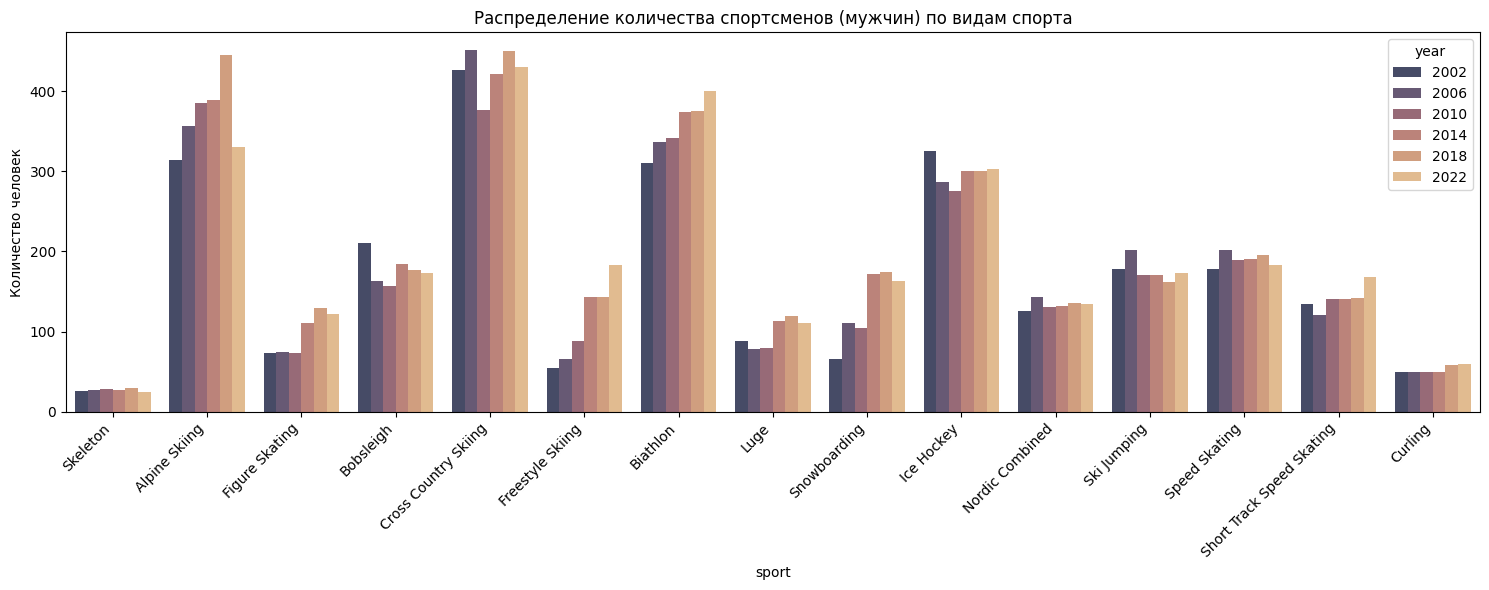

In [49]:
mplt.figure(figsize=[15,6])
colors = ['#41476BFF', '#675478FF', '#9E6374FF', '#C67B6FFF', '#DE9B71FF', '#EFBC82FF']
sns.countplot(data=df_winter_male, x='sport', hue='year', palette=colors)
mplt.title("Распределение количества спортсменов (мужчин) по видам спорта")
mplt.xticks(rotation=45, ha='right')
mplt.tight_layout()
mplt.ylabel("Количество человек")
mplt.show()

In [50]:
df_winter_female = df_winter[df_winter['sex']=='Female']
df_winter_female

,edition,year,edition_id,sport,athlete_id,sex,height,weight,country_athl,country_noc_athl
1343,Winter,2014,58,Alpine Skiing,127266,Female,163.0,56.0,Albania,ALB
1344,Winter,2014,58,Alpine Skiing,127266,Female,163.0,56.0,Albania,ALB
1353,Winter,2018,60,Alpine Skiing,127266,Female,163.0,56.0,Albania,ALB
1354,Winter,2018,60,Alpine Skiing,127266,Female,163.0,56.0,Albania,ALB
1905,Winter,2002,47,Figure Skating,101615,Female,168.0,52.0,Azerbaijan,AZE
...,...,...,...,...,...,...,...,...,...,...
316829,Winter,2022,62,Bobsleigh,148662,Female,205.0,123.0,Netherlands,NED
316830,Winter,2022,62,Bobsleigh,138683,Female,175.0,76.0,Slovakia,SVK
316831,Winter,2022,62,Bobsleigh,137542,Female,170.0,78.0,Republic of Korea,KOR
316832,Winter,2022,62,Bobsleigh,128682,Female,175.0,78.0,Jamaica United States,JAM


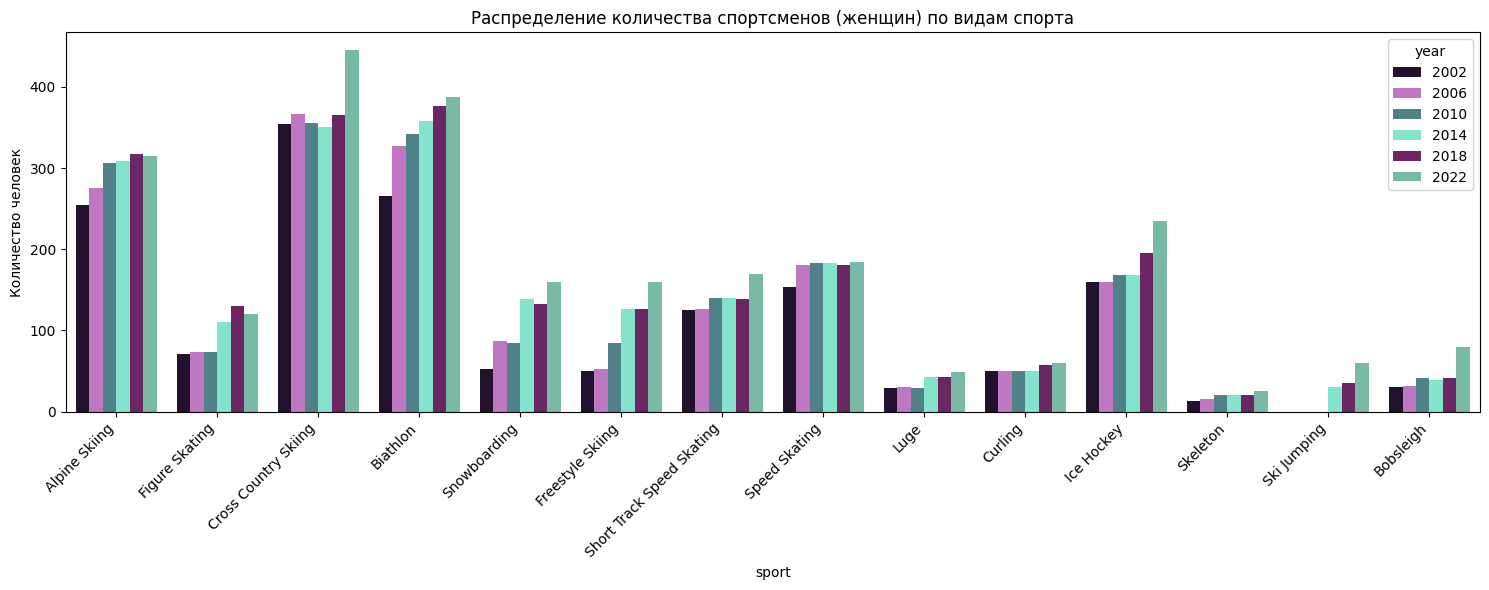

In [51]:
mplt.figure(figsize=[15,6])
colors = ['#240E31FF', '#CB6BCEFF', '#468892FF', '#74F3D3FF', '#751C6DFF', '#6EC5ABFF']
sns.countplot(data=df_winter_female, x='sport', hue='year', palette=colors)
mplt.title("Распределение количества спортсменов (женщин) по видам спорта")
mplt.xticks(rotation=45, ha='right')
mplt.tight_layout()
mplt.ylabel("Количество человек")
mplt.show()

***Вывод: Большинство спортсменов участвуют в таких лыжных состязаниях как: горные лыжи, лыжные гонки, биатлон. И мужчин, и женщин по этим видам приезжает приблизительно одинаково: от 300 до 450 человек. Также большое количество приезжает хоккеистов (в районе 250-300 человек каждого пола). Остальные виды спорта менее популярны.***

---



**В зимних Олимпийских играх выделяется Топ-4 видов спорта по количеству участников:**

In [52]:
top_4_win = df_winter.groupby('sport')['athlete_id'].count().sort_values(ascending=False).head(4)
print(top_4_win)
print("Всего спортсменов по этим видам спорта - ", sum(top_4_win))

sport
Cross Country Skiing    4792
Biathlon                4194
Alpine Skiing           3996
Ice Hockey              2878
Name: athlete_id, dtype: int64
Всего спортсменов по этим видам спорта -  15860


In [53]:
len(df_winter)-sum(top_4_win)

12807

***Вывод: количество спортсменов из топ-4 приблизительно равно количеству спортсменов по остальным 10-ти видам спорта***

---



Посмотрим распределение веса и роста спортсменов по самым популярным зимним видам спорта

In [54]:
df_winter['sport'].unique()

array(['Skeleton', 'Alpine Skiing', 'Figure Skating', 'Bobsleigh',
       'Cross Country Skiing', 'Freestyle Skiing', 'Biathlon', 'Luge',
       'Snowboarding', 'Ice Hockey', 'Nordic Combined',
       'Short Track Speed Skating', 'Ski Jumping', 'Speed Skating',
       'Curling'], dtype=object)

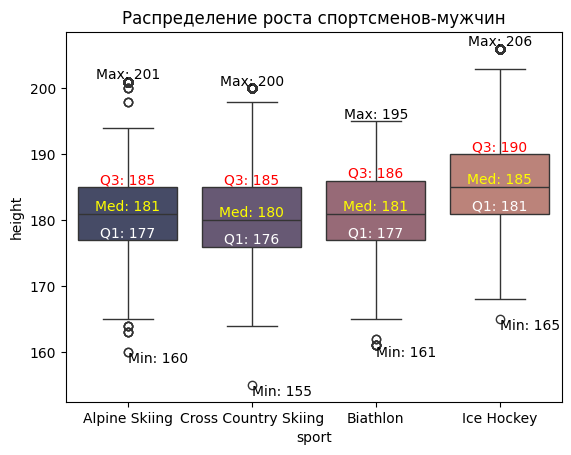

In [55]:
df_w_m_popular = df_winter_male[(df_winter_male['sport']=='Alpine Skiing') | (df_winter_male['sport']=='Cross Country Skiing') | (df_winter_male['sport']=='Biathlon') | (df_winter_male['sport']=='Ice Hockey')]
colors=['#41476BFF', '#675478FF', '#9E6374FF', '#C67B6FFF']
ax = sns.boxplot(data=df_w_m_popular, x='sport', hue='sport', y='height', palette=colors)
mplt.title("Распределение роста спортсменов-мужчин")
for i, group in enumerate(df_w_m_popular['sport'].unique()):
    group_data = df_w_m_popular[df_w_m_popular['sport'] == group]['height'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='yellow')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')

mplt.show()


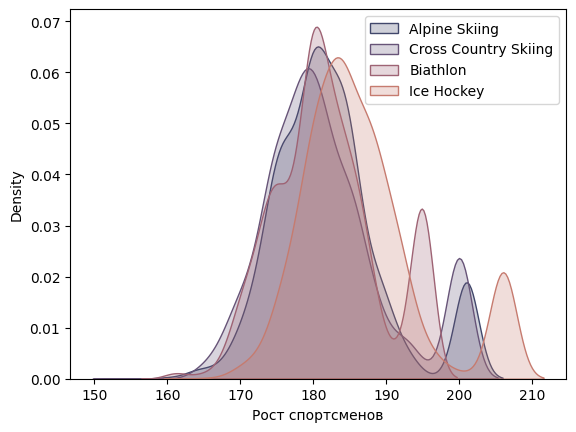

In [56]:
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Alpine Skiing']['height'], label="Alpine Skiing", fill = True, color='#41476BFF')
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Cross Country Skiing']['height'], label="Cross Country Skiing", fill = True, color='#675478FF')
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Biathlon']['height'], label="Biathlon", fill = True, color='#9E6374FF')
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Ice Hockey']['height'], label="Ice Hockey", fill=True, color='#C67B6FFF')
mplt.xlabel("Рост спортсменов")
mplt.legend()
mplt.show()

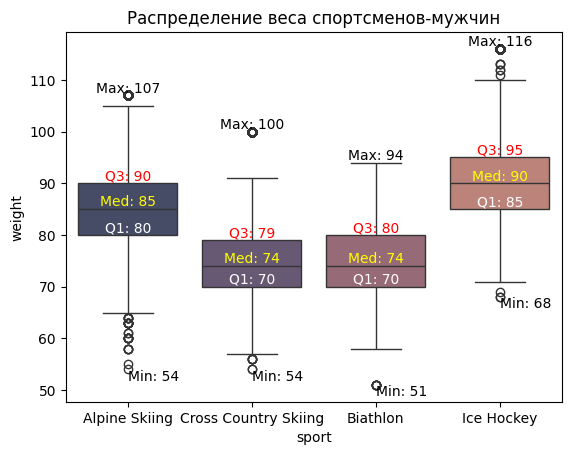

In [57]:
colors=['#41476BFF', '#675478FF', '#9E6374FF', '#C67B6FFF']
ax = sns.boxplot(data=df_w_m_popular, x='sport', y='weight', hue='sport', palette=colors)
mplt.title("Распределение веса спортсменов-мужчин")
for i, group in enumerate(df_w_m_popular['sport'].unique()):
    group_data = df_w_m_popular[df_w_m_popular['sport'] == group]['weight'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='yellow')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')
mplt.show()

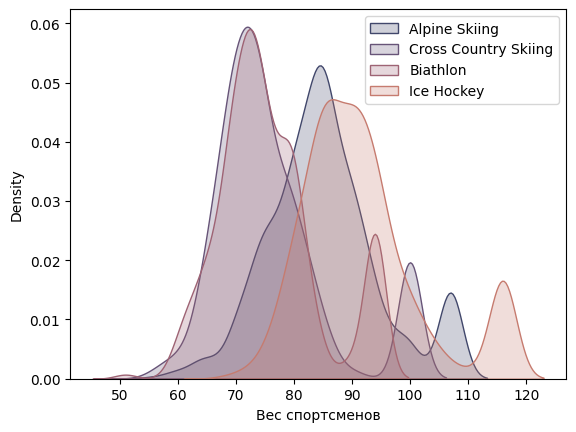

In [58]:
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Alpine Skiing']['weight'], label="Alpine Skiing", fill = True, color='#41476BFF')
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Cross Country Skiing']['weight'], label="Cross Country Skiing", fill = True, color='#675478FF')
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Biathlon']['weight'], label="Biathlon", fill = True, color='#9E6374FF')
sns.kdeplot(df_w_m_popular[df_w_m_popular['sport']=='Ice Hockey']['weight'], label="Ice Hockey", fill=True, color='#C67B6FFF')
mplt.xlabel("Вес спортсменов")
mplt.legend()
mplt.show()

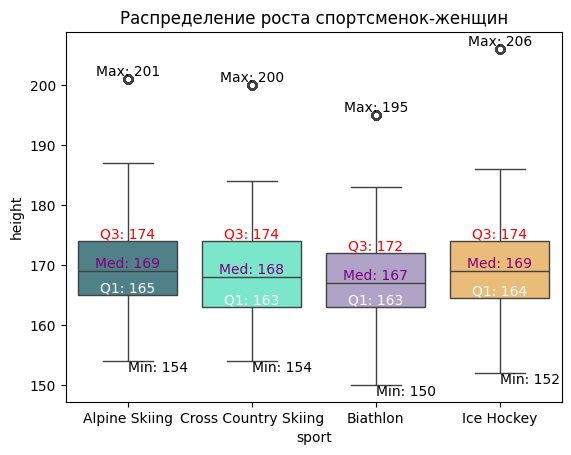

In [59]:
df_w_f_popular = df_winter_female[(df_winter_female['sport']=='Alpine Skiing') | (df_winter_female['sport']=='Cross Country Skiing') | (df_winter_female['sport']=='Biathlon') | (df_winter_female['sport']=='Ice Hockey')]
colors=['#468892FF', '#6BF7D4FF', '#AC9ECEFF', '#FDC067FF']
ax = sns.boxplot(data=df_w_f_popular, x='sport', y='height', hue='sport', palette=colors)
mplt.title("Распределение роста спортсменок-женщин")
for i, group in enumerate(df_w_f_popular['sport'].unique()):
    group_data = df_w_f_popular[df_w_f_popular['sport'] == group]['height'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='purple')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')
mplt.show()

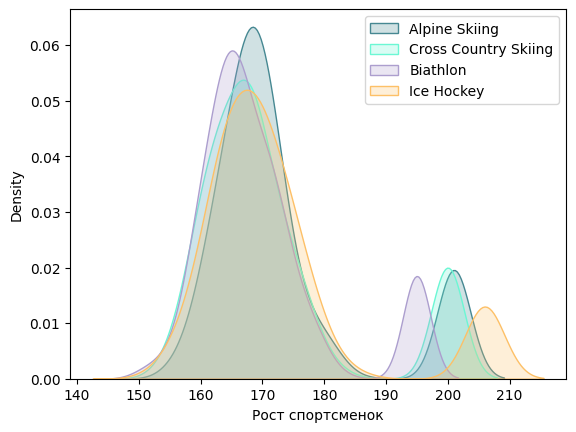

In [60]:
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Alpine Skiing']['height'], label="Alpine Skiing", fill = True, color='#468892FF')
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Cross Country Skiing']['height'], label="Cross Country Skiing", fill = True, color='#6BF7D4FF')
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Biathlon']['height'], label="Biathlon", fill = True, color='#AC9ECEFF')
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Ice Hockey']['height'], label="Ice Hockey", fill=True, color='#FDC067FF')
mplt.xlabel("Рост спортсменок")
mplt.legend()
mplt.show()

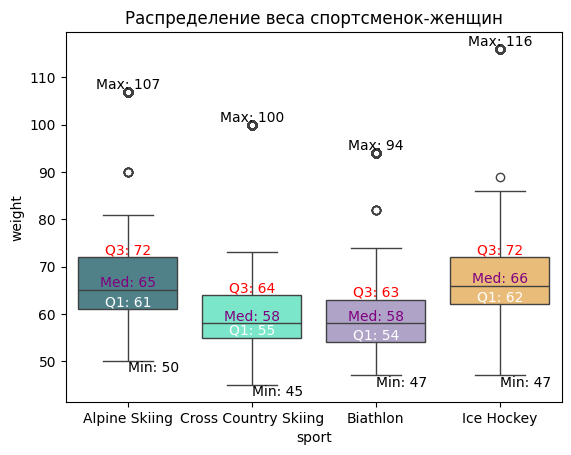

In [61]:
colors=['#468892FF', '#6BF7D4FF', '#AC9ECEFF', '#FDC067FF']
ax = sns.boxplot(data=df_w_f_popular, x='sport', y='weight', hue='sport', palette=colors)
mplt.title("Распределение веса спортсменок-женщин")
for i, group in enumerate(df_w_f_popular['sport'].unique()):
    group_data = df_w_f_popular[df_w_f_popular['sport'] == group]['weight'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='purple')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')

mplt.show()

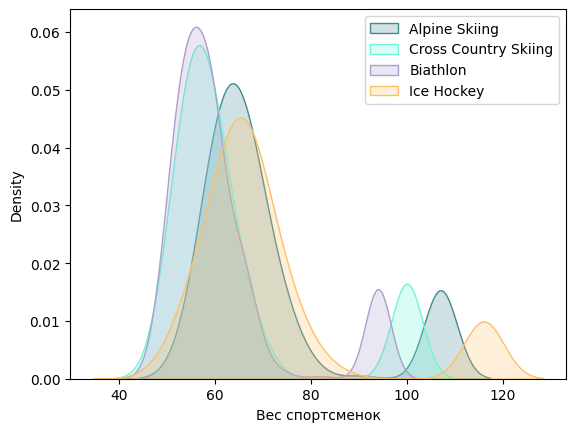

In [62]:
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Alpine Skiing']['weight'], label="Alpine Skiing", fill = True, color='#468892FF')
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Cross Country Skiing']['weight'], label="Cross Country Skiing", fill = True, color='#6BF7D4FF')
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Biathlon']['weight'], label="Biathlon", fill = True, color='#AC9ECEFF')
sns.kdeplot(df_w_f_popular[df_w_f_popular['sport']=='Ice Hockey']['weight'], label="Ice Hockey", fill=True, color='#FDC067FF')
mplt.xlabel("Вес спортсменок")
mplt.legend()
mplt.show()

***Вывод: Наблюдаем незначительные отличия границ в параметрах мужчин и женщин. Для удобства размещения спортсменов самых популярных видов спорта рекомендуется обустраивать помещения исходя из следующих габаритов: и мужчинам, и женщинам - рост: от 150 до 206 см, вес: от 45 до 116 кг***

---



Посмотрим распределение количества спортсменов по странам, из которых они приехали:

In [63]:
print("Количество стран, из которых приехали спортсмены-мужчины - ", len(df_winter_male['country_noc_athl'].unique()))
print("Количество стран, из которых приехали спортсменки-женщины - ", len(df_winter_female['country_noc_athl'].unique()))

Количество стран, из которых приехали спортсмены-мужчины -  112
Количество стран, из которых приехали спортсменки-женщины -  92


***Вывод: Ввиду очень большого количества стран из которых приехали спортсмены, неинформативно будет проводить анализ по странам. При наличии данных о языках, на которых говорят спортсмены, возможно провести анализ с целью создания языковых групп.***

---



# Летние игры:

Посмотрим на распределение данных по гендерному признаку.

In [64]:
df_summer_male = df_summer[df_summer['sex']=='Male']
df_summer_male

,edition,year,edition_id,sport,athlete_id,sex,height,weight,country_athl,country_noc_athl
383,Summer,2000,25,Athletics,83241,Male,173.0,64.0,Aruba,ARU
385,Summer,2000,25,Judo,91878,Male,173.0,66.0,Aruba,ARU
386,Summer,2000,25,Swimming,93253,Male,176.0,72.0,Aruba,ARU
388,Summer,2004,26,Athletics,105469,Male,185.0,83.0,Aruba,ARU
389,Summer,2004,26,Swimming,93253,Male,176.0,72.0,Aruba,ARU
...,...,...,...,...,...,...,...,...,...,...
316410,Summer,2020,61,Wrestling,147509,Male,204.0,130.0,United States,USA
316411,Summer,2020,61,Wrestling,147508,Male,204.0,130.0,United States,USA
316412,Summer,2020,61,Wrestling,147505,Male,183.0,86.0,United States,USA
316413,Summer,2020,61,Wrestling,136404,Male,180.0,102.0,United States,USA


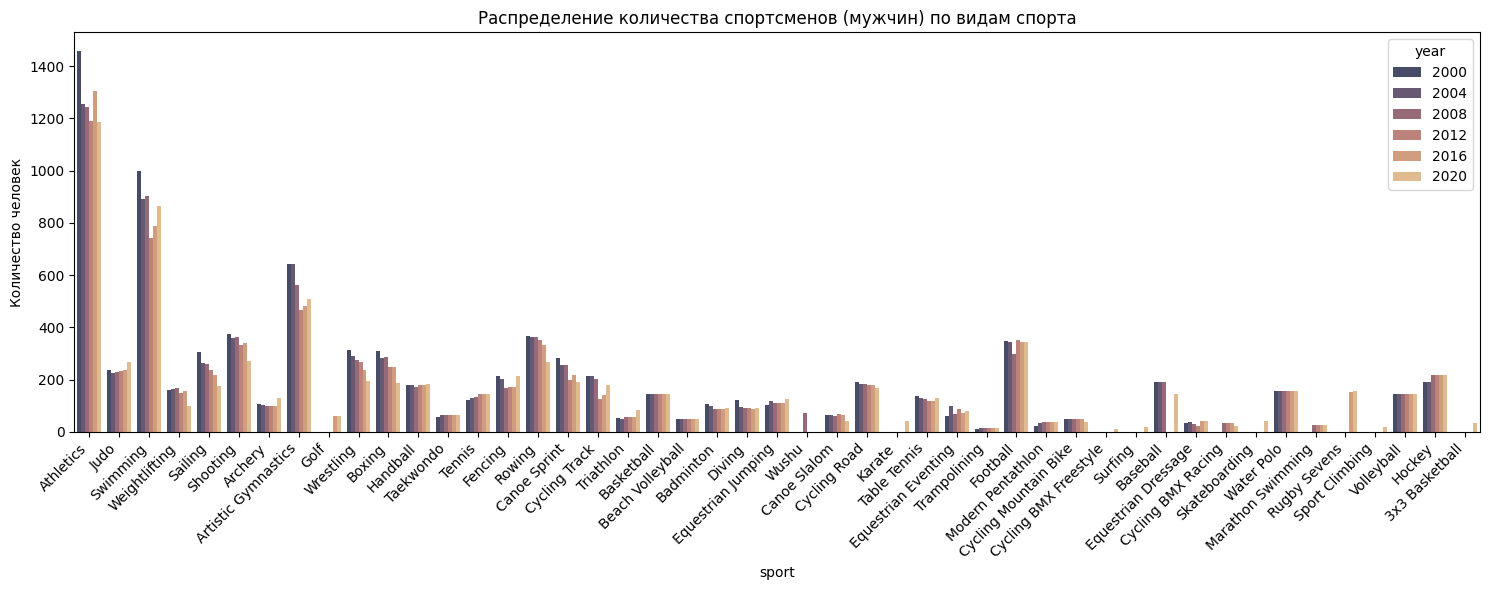

In [65]:
mplt.figure(figsize=[15,6])
colors=['#41476BFF', '#675478FF', '#9E6374FF', '#C67B6FFF', '#DE9B71FF', '#EFBC82FF']
sns.countplot(data=df_summer_male, x='sport', hue='year', palette=colors)
mplt.title("Распределение количества спортсменов (мужчин) по видам спорта")
mplt.xticks(rotation=45, ha='right')
mplt.tight_layout()
mplt.ylabel("Количество человек")
mplt.show()

In [66]:
df_summer_female = df_summer[df_summer['sex']=='Female']
df_summer_female

,edition,year,edition_id,sport,athlete_id,sex,height,weight,country_athl,country_noc_athl
384,Summer,2000,25,Athletics,83240,Female,158.0,50.0,Aruba,ARU
387,Summer,2000,25,Swimming,93254,Female,171.0,56.0,Aruba,ARU
390,Summer,2004,26,Swimming,93254,Female,171.0,56.0,Aruba,ARU
396,Summer,2012,54,Swimming,123200,Female,165.0,61.0,Aruba,ARU
399,Summer,2016,59,Sailing,124743,Female,171.0,65.0,Aruba Independent Olympic Athletes,ARU
...,...,...,...,...,...,...,...,...,...,...
316416,Summer,2020,61,Wrestling,147307,Female,204.0,130.0,United States,USA
316417,Summer,2020,61,Wrestling,132194,Female,163.0,57.0,United States,USA
316418,Summer,2020,61,Wrestling,147308,Female,204.0,130.0,United States,USA
316419,Summer,2020,61,Wrestling,147310,Female,204.0,130.0,United States,USA


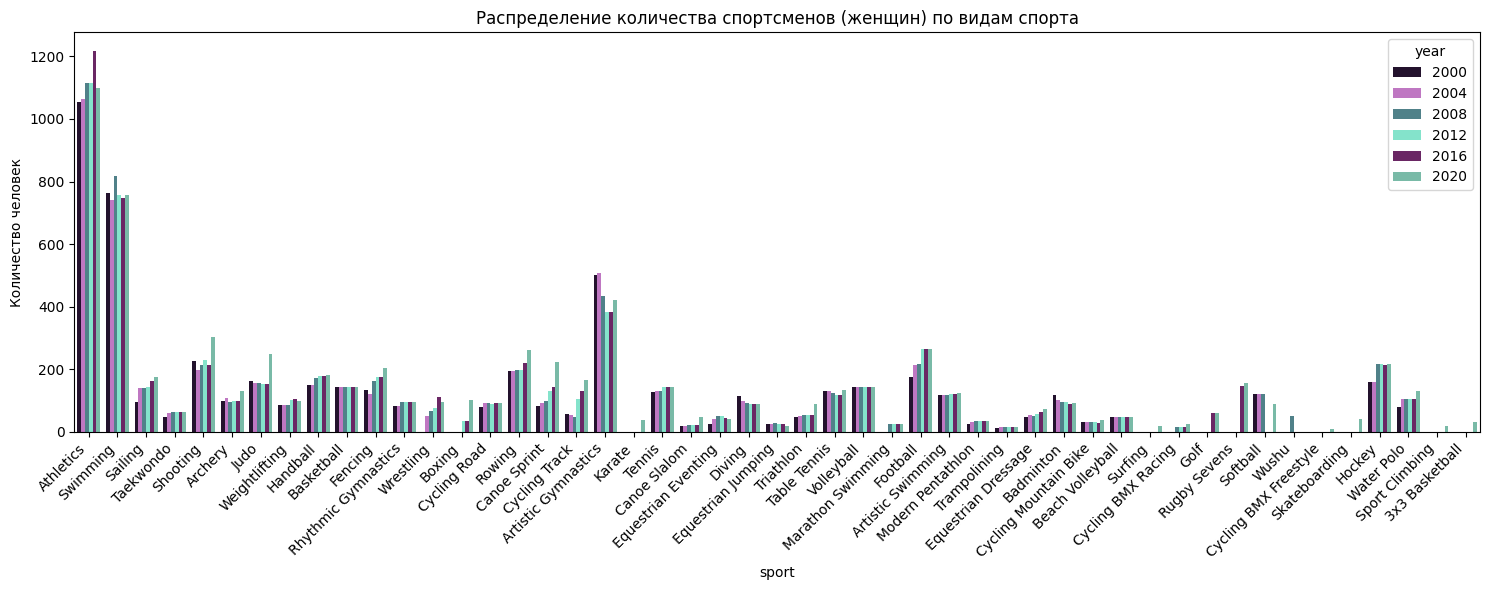

In [67]:
mplt.figure(figsize=[15,6])
colors = ['#240E31FF', '#CB6BCEFF', '#468892FF', '#74F3D3FF', '#751C6DFF', '#6EC5ABFF']
sns.countplot(data=df_summer_female, x='sport', hue='year', palette=colors)
mplt.title("Распределение количества спортсменов (женщин) по видам спорта")
mplt.xticks(rotation=45, ha='right')
mplt.tight_layout()
mplt.ylabel("Количество человек")
mplt.show()

***Вывод: Максимальное количество спортсменов летних Олимпиад участвуют в лёгкой атлетике: около 1250 мужчин и около 1100 женщин - это в 4-5 раз превышает численность большинства других видов спорта.***

---



**В летних Олимпийских играх ярко выделяется Топ-3 видов спорта по количеству участников.**

In [68]:
top_3_summer = df_summer.groupby('sport')['athlete_id'].count().sort_values(ascending=False).head(3)
print(top_3_summer)
print("Всего спортсменов, участвующих в этих видах спорта - ", sum(top_3_summer))

sport
Athletics              14300
Swimming                9772
Artistic Gymnastics     5932
Name: athlete_id, dtype: int64
Всего спортсменов, участвующих в этих видах спорта -  30004


In [69]:
len(df_summer)-sum(top_3_summer)

53733

***Вывод: спортсмены из топ-3 составляют 1/3 часть всех спортсменов летних Олимпийских игр***

---



Посмотрим распределение веса и роста спортсменов по самым популярным летним видам спорта: лёгкой атлетике, плаванию и художественной гимнастике

In [70]:
print(df_summer['sport'].unique())
print(len(df_summer['sport'].unique()), " летних видов спорта")

['Athletics' 'Judo' 'Swimming' 'Weightlifting' 'Sailing' 'Taekwondo'
 'Shooting' 'Archery' 'Artistic Gymnastics' 'Golf' 'Wrestling' 'Boxing'
 'Handball' 'Tennis' 'Fencing' 'Rowing' 'Canoe Sprint' 'Cycling Track'
 'Triathlon' 'Basketball' 'Beach Volleyball' 'Badminton' 'Diving'
 'Rhythmic Gymnastics' 'Equestrian Jumping' 'Wushu' 'Cycling Road'
 'Canoe Slalom' 'Karate' 'Table Tennis' 'Equestrian Eventing'
 'Trampolining' 'Volleyball' 'Football' 'Marathon Swimming'
 'Artistic Swimming' 'Modern Pentathlon' 'Equestrian Dressage'
 'Cycling Mountain Bike' 'Cycling BMX Freestyle' 'Surfing' 'Baseball'
 'Cycling BMX Racing' 'Rugby Sevens' 'Skateboarding' 'Water Polo'
 'Softball' 'Sport Climbing' 'Hockey' '3x3 Basketball']
50  летних видов спорта


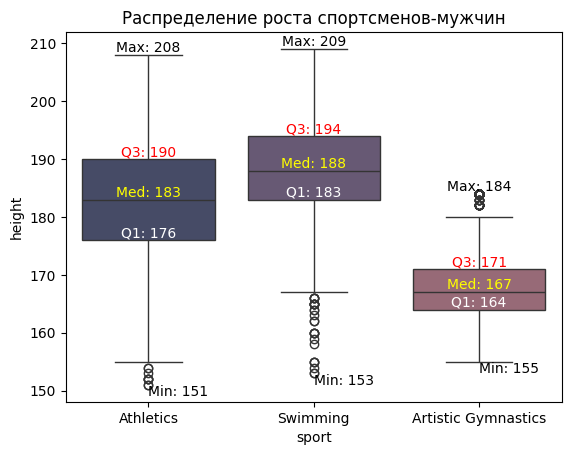

In [71]:
df_s_m_popular = df_summer_male[(df_summer_male['sport']=='Athletics') | (df_summer_male['sport']=='Swimming') | (df_summer_male['sport']=='Artistic Gymnastics')]
colors=['#41476BFF', '#675478FF', '#9E6374FF']
ax = sns.boxplot(data=df_s_m_popular, x='sport', y='height', hue='sport', palette=colors)
mplt.title("Распределение роста спортсменов-мужчин")
for i, group in enumerate(df_s_m_popular['sport'].unique()):
    group_data = df_s_m_popular[df_s_m_popular['sport'] == group]['height'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='yellow')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')
mplt.show()

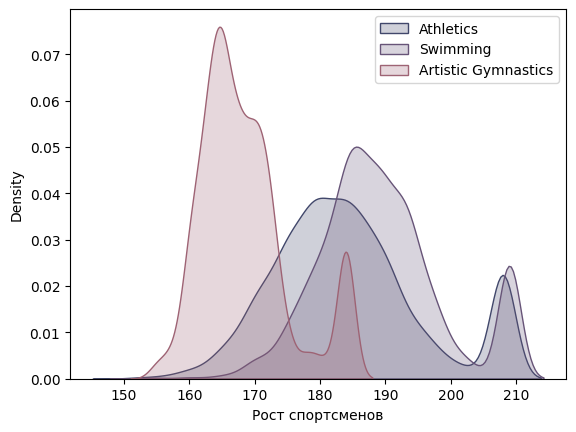

In [72]:
sns.kdeplot(df_s_m_popular[df_s_m_popular['sport']=='Athletics']['height'], label="Athletics", fill = True, color='#41476BFF')
sns.kdeplot(df_s_m_popular[df_s_m_popular['sport']=='Swimming']['height'], label="Swimming", fill = True, color='#675478FF')
sns.kdeplot(df_s_m_popular[df_s_m_popular['sport']=='Artistic Gymnastics']['height'], label="Artistic Gymnastics", fill = True, color='#9E6374FF')
mplt.xlabel("Рост спортсменов")
mplt.legend()
mplt.show()

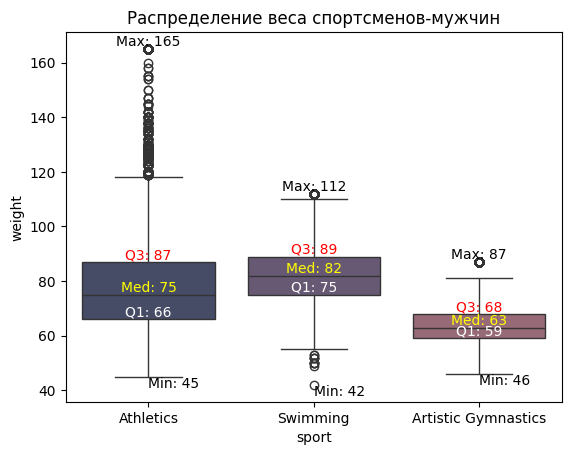

In [73]:
colors=['#41476BFF', '#675478FF', '#9E6374FF']
ax = sns.boxplot(data=df_s_m_popular, x='sport', y='weight', hue='sport', palette=colors)
mplt.title("Распределение веса спортсменов-мужчин")
for i, group in enumerate(df_s_m_popular['sport'].unique()):
    group_data = df_s_m_popular[df_s_m_popular['sport'] == group]['weight'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='yellow')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')
mplt.show()

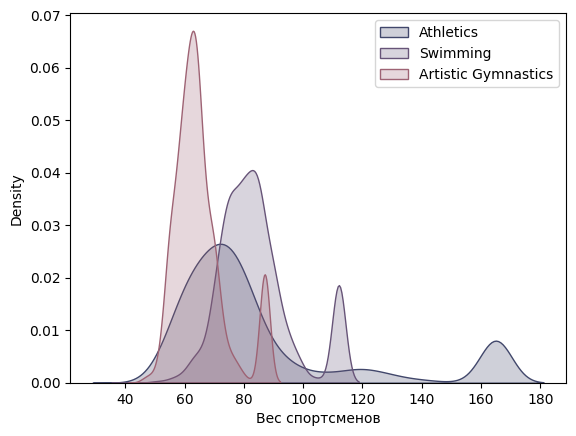

In [74]:
sns.kdeplot(df_s_m_popular[df_s_m_popular['sport']=='Athletics']['weight'], label="Athletics", fill = True, color='#41476BFF')
sns.kdeplot(df_s_m_popular[df_s_m_popular['sport']=='Swimming']['weight'], label="Swimming", fill = True, color='#675478FF')
sns.kdeplot(df_s_m_popular[df_s_m_popular['sport']=='Artistic Gymnastics']['weight'], label="Artistic Gymnastics", fill = True, color='#9E6374FF')
mplt.xlabel("Вес спортсменов")
mplt.legend()
mplt.show()

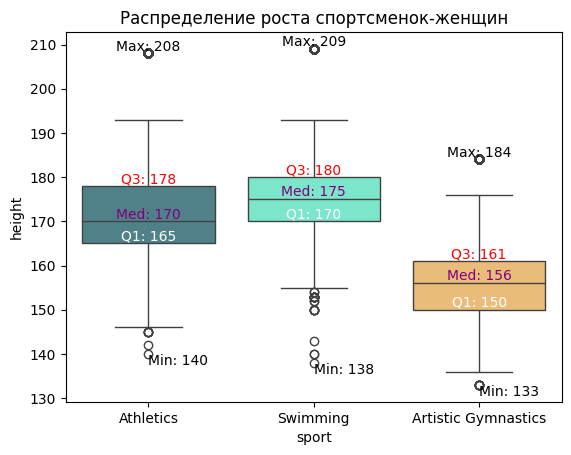

In [75]:
df_s_f_popular = df_summer_female[(df_summer_female['sport']=='Athletics') | (df_summer_female['sport']=='Swimming') | (df_summer_female['sport']=='Artistic Gymnastics')]
colors=['#468892FF', '#6BF7D4FF', '#FDC067FF']
ax = sns.boxplot(data=df_s_f_popular, x='sport', y='height', hue='sport', palette=colors)
mplt.title("Распределение роста спортсменок-женщин")
for i, group in enumerate(df_s_f_popular['sport'].unique()):
    group_data = df_s_f_popular[df_s_f_popular['sport'] == group]['height'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='purple')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')
mplt.show()

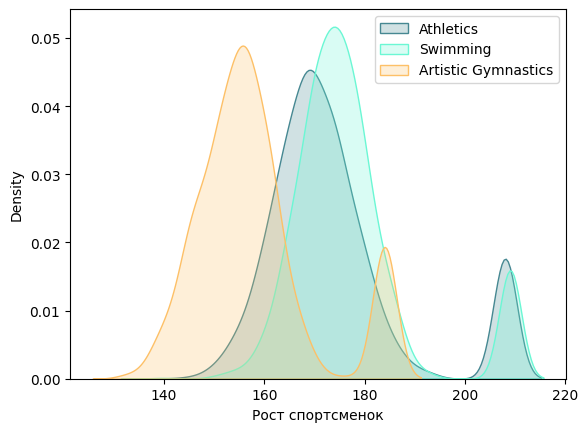

In [76]:
sns.kdeplot(df_s_f_popular[df_s_f_popular['sport']=='Athletics']['height'], label="Athletics", fill = True, color='#468892FF')
sns.kdeplot(df_s_f_popular[df_s_f_popular['sport']=='Swimming']['height'], label="Swimming", fill = True, color='#6BF7D4FF')
sns.kdeplot(df_s_f_popular[df_s_f_popular['sport']=='Artistic Gymnastics']['height'], label="Artistic Gymnastics", fill=True, color='#FDC067FF')
mplt.xlabel("Рост спортсменок")
mplt.legend()
mplt.show()

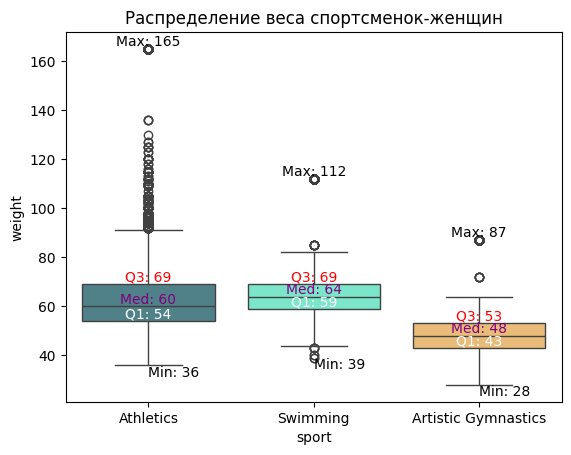

In [77]:
colors=['#468892FF', '#6BF7D4FF', '#FDC067FF']
ax = sns.boxplot(data=df_s_f_popular, x='sport', y='weight', hue='sport', palette=colors)
mplt.title("Распределение веса спортсменок-женщин")
for i, group in enumerate(df_s_f_popular['sport'].unique()):
    group_data = df_s_f_popular[df_s_f_popular['sport'] == group]['weight'].dropna()
    min_h = np.min(group_data)
    max_h = np.max(group_data)
    q1, median, q3 = np.percentile(group_data, [25, 50, 75])
    ax.text(i, min_h, f'Min: {min_h:.0f}', va='top', color='black')
    ax.text(i, max_h, f'Max: {max_h:.0f}', ha='center', va='bottom', color='black')
    ax.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', color='white')
    ax.text(i, median, f'Med: {median:.0f}', ha='center', va='bottom', color='purple')
    ax.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='bottom', color='red')
mplt.show()

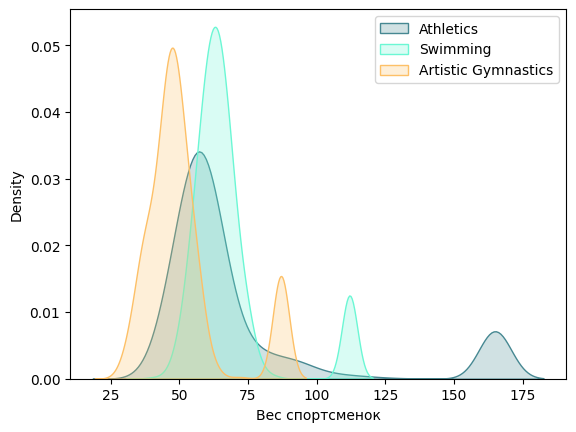

In [78]:
sns.kdeplot(df_s_f_popular[df_s_f_popular['sport']=='Athletics']['weight'], label="Athletics", fill = True, color='#468892FF')
sns.kdeplot(df_s_f_popular[df_s_f_popular['sport']=='Swimming']['weight'], label="Swimming", fill = True, color='#6BF7D4FF')
sns.kdeplot(df_s_f_popular[df_s_f_popular['sport']=='Artistic Gymnastics']['weight'], label="Artistic Gymnastics", fill=True, color='#FDC067FF')
mplt.xlabel("Вес спортсменок")
mplt.legend()
mplt.show()

***Вывод: Наблюдаем очень большое количество выбросов в данных по лёгкой атлетике. Это обусловлено разнообразием мероприятий по этому виду спорта (лёгкая/тяжёлая атлетика и прочее). Незначительные отличия границ в параметрах мужчин и женщин. Для удобства размещения спортсменов самых популярных видов спорта рекомендуется обустраивать помещения исходя из следующих габаритов: и мужчинам, и женщинам - рост: от 150 до 206 см, вес: от 45 до 116 кг***

---



Посмотрим распределение количества спортсменов по странам, из которых они приехали:

In [79]:
print("Количество стран, из которых приехали спортсмены-мужчины - ", len(df_summer_male['country_noc_athl'].unique()))
print("Количество стран, из которых приехали спортсменки-женщины - ", len(df_summer_female['country_noc_athl'].unique()))

Количество стран, из которых приехали спортсмены-мужчины -  214
Количество стран, из которых приехали спортсменки-женщины -  215


***Ввиду очень большого количества стран из которых приехали спортсмены, неинформативно будет проводить анализ по странам. При наличии данных о языках, на которых говорят спортсмены, возможно провести анализ с целью создания языковых групп.***


---


# Проверка гипотезы на примере зимних Олимпийских игр:
**Гипотеза: Для обустройства Олимпийской деревни достаточно ориентироваться на данные спортсменов из популярных видов спорта: средние данные веса и роста спортсменов из топ-списка видов спорта приблизительно одинаковые со средними значениями веса и роста спортсменов по остальным видам спорта.**

In [80]:
df_w_m_not_popular = df_winter_male[~df_winter_male['sport'].isin(df_w_m_popular['sport'])]
df_w_f_not_popular = df_winter_female[~df_winter_female['sport'].isin(df_w_f_popular['sport'])]

In [81]:
print(len(df_w_m_not_popular), " ", len(df_w_f_not_popular))

8024   4783


**Для мужчин-спортсменов:**

In [82]:
df_w_m_popular['height'].mean()

np.float64(182.72748161764707)

In [83]:
df_w_m_not_popular['height'].mean()

np.float64(181.0752741774676)

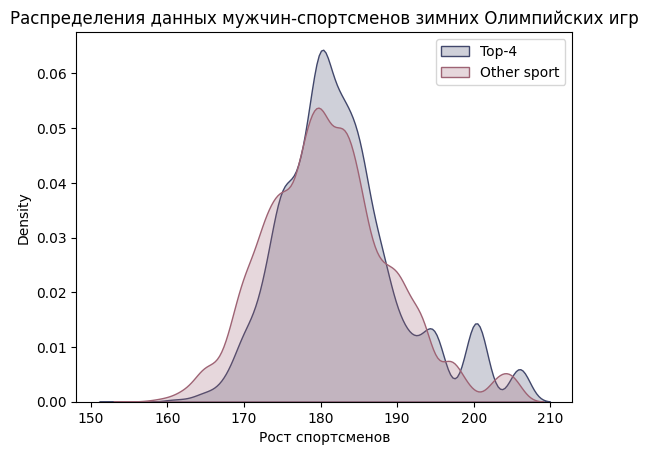

In [84]:
sns.kdeplot(df_w_m_popular['height'], label="Top-4", fill = True, color='#41476BFF')
sns.kdeplot(df_w_m_not_popular['height'], label="Other sport", fill = True, color='#9E6374FF')
mplt.xlabel("Рост спортсменов")
mplt.legend()
mplt.title("Распределения данных мужчин-спортсменов зимних Олимпийских игр")
mplt.show()

In [85]:
df_w_m_popular['weight'].mean()

np.float64(81.41383272058823)

In [86]:
df_w_m_not_popular['weight'].mean()

np.float64(78.76059322033899)

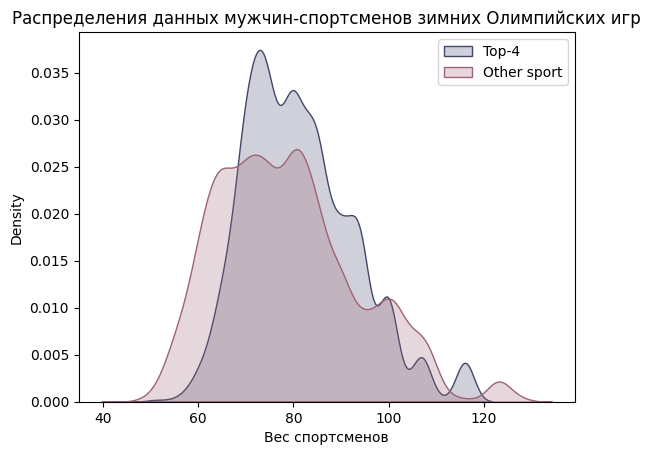

In [87]:
sns.kdeplot(df_w_m_popular['weight'], label="Top-4", fill = True, color='#41476BFF')
sns.kdeplot(df_w_m_not_popular['weight'], label="Other sport", fill = True, color='#9E6374FF')
mplt.xlabel("Вес спортсменов")
mplt.legend()
mplt.title("Распределения данных мужчин-спортсменов зимних Олимпийских игр")
mplt.show()

***Вывод: Средние роста и веса спортсменов-мужчин из Топ-4 больше, чем из остальных видов спорта. На графике распределения плотности данных мы видим значительное утолщение в районе максимального веса спортсменов из других видов спорта. Но мы заменяли пропущенные значения максимумами. Плотность максимальных значений веса спортсменов популярных видов больше и очень близка к этому утолщению, поэтому в рекомендациях немного скорректируем максимальные значения роста и веса, округлив их в большую сторону. Новые значения будут: рост - до 210 см, а вес - до 120 кг. В целом, обустройство помещения под габариты спортсменов из Топ-4 устроит и спортсменов из других видов спорта.***

---



**Для женской аудитории:**

In [88]:
df_w_f_popular['height'].mean()

np.float64(171.26425377305756)

In [89]:
df_w_f_not_popular['height'].mean()

np.float64(170.52937486932888)

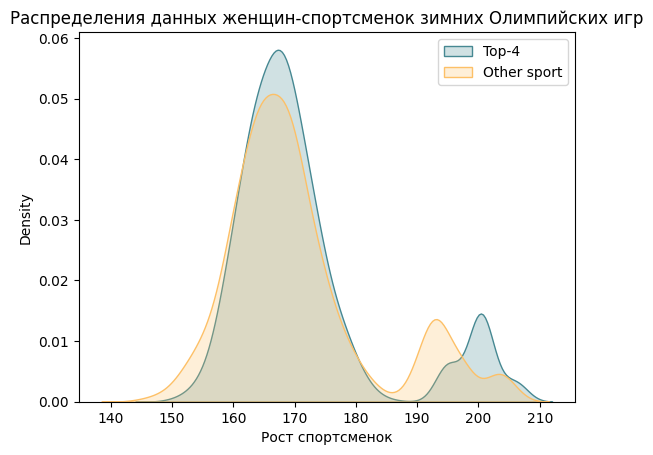

In [90]:
sns.kdeplot(df_w_f_popular['height'], label="Top-4", fill = True, color='#468892FF')
sns.kdeplot(df_w_f_not_popular['height'], label="Other sport", fill=True, color='#FDC067FF')
mplt.xlabel("Рост спортсменок")
mplt.legend()
mplt.title("Распределения данных женщин-спортсменок зимних Олимпийских игр")
mplt.show()

In [91]:
df_w_f_popular['weight'].mean()

np.float64(65.64407490218)

In [92]:
df_w_f_not_popular['weight'].mean()

np.float64(65.61321346435291)

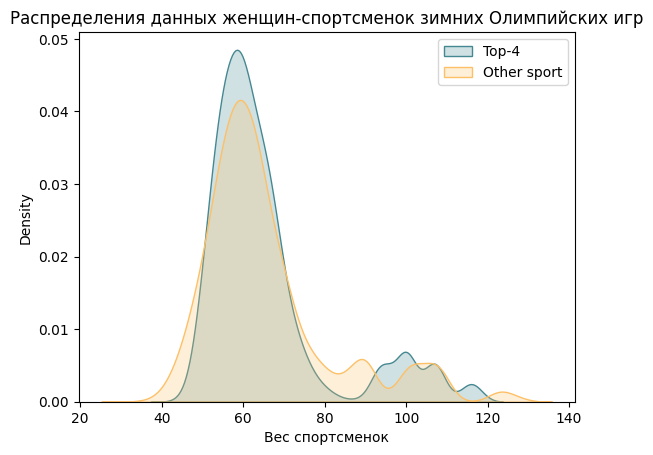

In [93]:
sns.kdeplot(df_w_f_popular['weight'], label="Top-4", fill = True, color='#468892FF')
sns.kdeplot(df_w_f_not_popular['weight'], label="Other sport", fill=True, color='#FDC067FF')
mplt.xlabel("Вес спортсменок")
mplt.legend()
mplt.title("Распределения данных женщин-спортсменок зимних Олимпийских игр")
mplt.show()

***Вывод: Аналогичную картину видим и у спортсменок-женщин, значит обустройство помещения под габариты спортсменок из Топ-4 устроит и спортсменок из других видов спорта.***


---


## Общий вывод:
***Проведённый анализ позволил определить метрики, влияющих на обустройство Олимпийской деревни и составить рекомендации для организаторов будущих Олимпийских игр. Данные были объединены из нескольких источников, проведена их очистка, преобразование и фильтрация, оставляющая только записи об играх, начиная с 2000 года, что позволяет сосредоточиться на современной истории Олимпиад с более актуальной геополитической картой мира и избежать проблем с историческими изменениями стран.***

**Итоговые рекомендации:**
1) Рекомендуется продолжить исследование с учётом дополнительных данных: при наличии данных о языках, на которых говорят спортсмены, возможно провести анализ с целью создания языковых групп.
2) Обратить внимание на расселение в отдельные, рядом стоящие корпуса спортсменов, участвующих в летних видах спорта: лёгкой атлетике, плаванию и художественной гимнастике, в зимних видах спота: горные лыжи, лыжные гонки, биатлон и хоккей.
При этом, учесть, что: наибольший средний рост у спортсменов в баскетболе, волейболе, плавании; наименьший рост — в гимнастике, борьбе, тяжёлой атлетике.
3) Учесть рост и вес при проектировании кроватей, душевых и других помещений. Предусмотреть мебель и оборудование для спортсменов с разными антропометрическими данными:
- Для обустройства помещений на период зимних Олимпийских игр рекомендуется учитывать габариты и мужчин, и женщин: рост: от 150 до 210 см, вес: от 45 до 120 кг
- Для обустройства помещений на период летних Олимпийских игр рекомендуется учитывать габариты и мужчин, и женщин: рост: от 133 до 209 см, вес: от 28 до 165 кг
4) Обратить внимание на то, что спортсмены из разных стран имеют значительные различия в антропометрических данных. Например, спортсмены из стран Северной Европы в среднем выше и тяжелее.
5) Учесть, что заметен рост средних показателей роста и веса у спортсменов за последние 20 лет.
6) Учесть повышенные потребности в калориях для спортсменов с большим весом и интенсивными нагрузками.
7) Обеспечить комфортное перемещение спортсменов разного роста и веса.
